In [20]:
import sys
module_path = 'C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT'
sys.path.insert(1, module_path)
import Meta_SCMT
import numpy as np

In [21]:
import matplotlib.pyplot as plt

In [22]:
GP = {
    'dim' : 2, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.32,
    'res' : 20, #resolution within one period
    'downsample_ratio': 0.5, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.625,
    'n_sub' : 1, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.12, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.31,
    'dh' : 0.005, #the step size of h.
    'path' : "sim_cache_TiO2_lam625nm/", #the inter state store path            
}

In [23]:
sim = Meta_SCMT.Sim(**GP)

C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\simulator.py:74: UserWarning: Your global parameters have changed. be careful loading any cached data, it may be in consist!
  warnings.warn('Your global parameters have changed. be careful loading any cached data, it may be in consist!')


If dowmsample_ratio changed, it only need to rerun fitting E.
It is ok to change n_sub, which is decoupled with the cached data.


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\modes2D.py:24: UserWarning: Unlike gen modes 1D which is done locally. gen modes 2D is tricky. because we have to comunicate with tidy3d. Error can happen.            To debug, you have to get yourself familiar with tidy3d (the ideal of upload sim to cloud and download results after the sim is done.            Or, you can try to restart your jupyter notebook and running everythin from begining. The drawback is gen_modes() is usually slow and restart won't promise good results.
  warnings.warn("Unlike gen modes 1D which is done locally. gen modes 2D is tricky. because we have to comunicate with tidy3d. Error can happen.\


Initializing simulation...
Mesh step (micron): [5.00e-02, 5.00e-02, 5.00e-02].
Simulation domain in number of grid points: [88, 88, 50].
Total number of computational grid points: 3.87e+05.
Total number of time steps: 1.
Estimated data size (GB) of monitor monitor: 0.0002.
Mode set, recommend verifying using viz_modes.


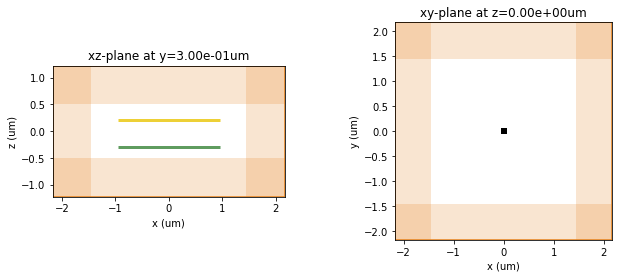

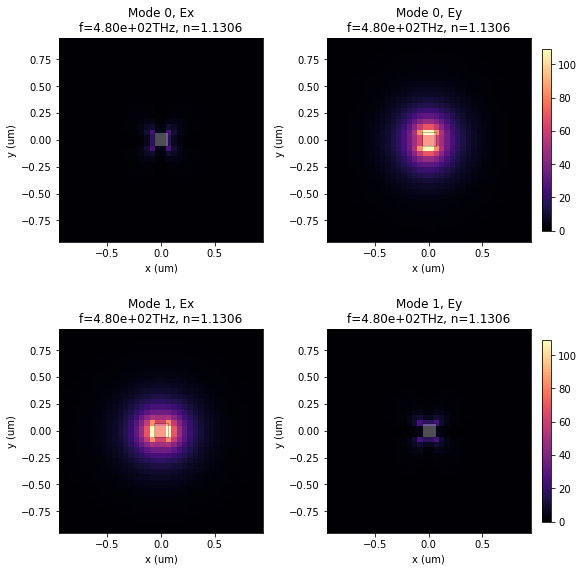

In [5]:
sim.gen_modes.local_preview(GP['h_min'])

In [6]:
base_dir = "modes2D_tidy3d_out_625nm/"
batch_path = "modes2D_saved_batch_index_625nm"
sim.gen_modes.upload(batch_path, base_dir)
sim.gen_modes.monitor()

Using Tidy3D credentials from stored file
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using 

Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational grid points: 4.10e+06.
Total number of time steps: 2.
Estimated data size (GB) of monitor monitor: 0.0020.
Mode set, recommend verifying using viz_modes.
Initializing simulation...
Mesh step (micron): [1.61e-02, 1.61e-02, 1.61e-02].
Simulation domain in number of grid points: [211, 211, 92].
Total number of computational g

Percentage of jobs completed: : 100%|██████████████████████████████████████████████████| 39/39 [05:02<00:00,  7.74s/it]


In [24]:
sim.gen_modes.gen(load = True)
sim.gen_modes.count_modes()

modes lib load sucessed.
remove not needed keys...
key removed.
total keys:  39
number of non zero modes:  [35.]


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\modes2D.py:125: UserWarning: expected total waveguides:38.0loaded:39
  warnings.warn("expected total waveguides:" + str(total_hs) + "loaded:" + str(load_total_hs))
C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\modes2D.py:42: UserWarning: better make h_min larger, because some h that is too small to allow any mode to propagate.
  warnings.warn("better make h_min larger, because some h that is too small to allow any mode to propagate.")


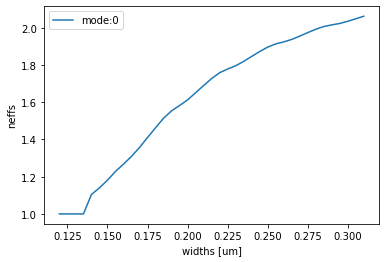

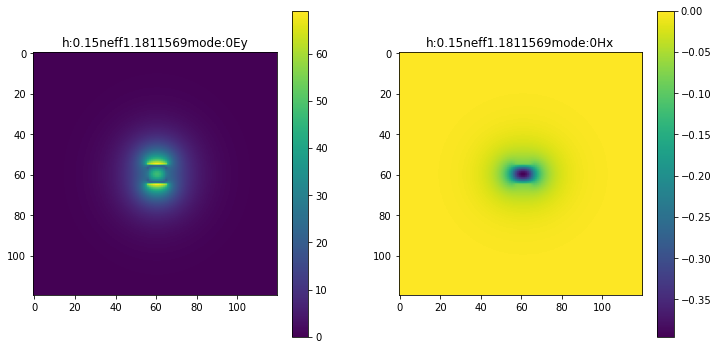

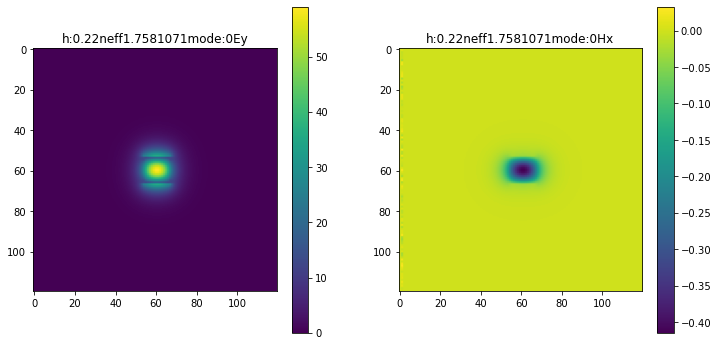

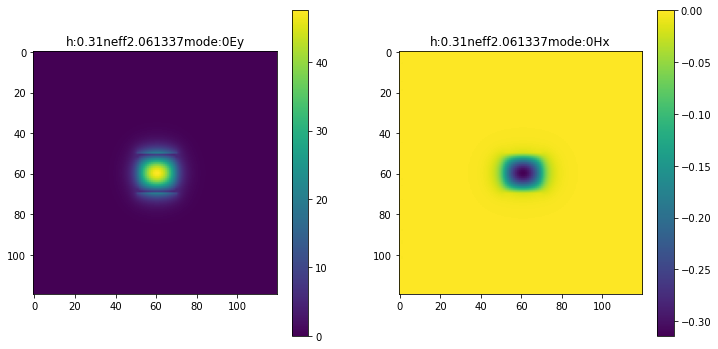

In [9]:
sim.gen_modes.vis_neffs()
H = [0.15, 0.22, 0.31]
sim.gen_modes.vis_field(H)

using device:  cuda
decay_rate: 0.79
total epoches:10000 [curr:    0 relative_error:101.831000%].
total epoches:10000 [curr: 1000 relative_error:0.720000%].
total epoches:10000 [curr: 2000 relative_error:0.731000%].
total epoches:10000 [curr: 3000 relative_error:0.618000%].
total epoches:10000 [curr: 4000 relative_error:0.528000%].
total epoches:10000 [curr: 5000 relative_error:0.471000%].
total epoches:10000 [curr: 6000 relative_error:0.483000%].
total epoches:10000 [curr: 7000 relative_error:0.512000%].
total epoches:10000 [curr: 8000 relative_error:0.462000%].
total epoches:10000 [curr: 9000 relative_error:0.431000%].
total epoches:10000 [curr: 9999 relative_error:0.441000%].
fitting error > 0.1%, increase total steps or number of layers in fullconnected network.(note: < 1% is good enough, but < 0.1% is the safest.)
model saved.


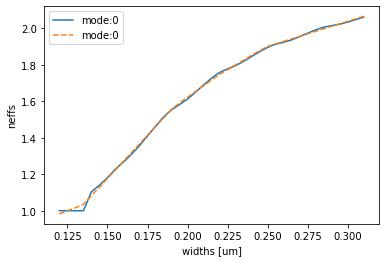

[[1.1770108]
 [1.7475212]
 [2.0661077]]


In [10]:
sim.fitting_neffs.fit(vis=True, layers = 4, save_fig= False)
neffs = sim.fitting_neffs.apply(H)
print(neffs)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:01<00:00, 21.81it/s]


C dataset generated. dataset size: 21294
C dataset saved.
using device:  cuda
decay_rate: 0.79
total epoches: 3000 [curr:    0 relative_error:29.755000%].
total epoches: 3000 [curr:  300 relative_error:0.670000%].
total epoches: 3000 [curr:  600 relative_error:1.375000%].
total epoches: 3000 [curr:  900 relative_error:0.855000%].
total epoches: 3000 [curr: 1200 relative_error:0.951000%].
total epoches: 3000 [curr: 1500 relative_error:0.611000%].
total epoches: 3000 [curr: 1800 relative_error:0.678000%].
total epoches: 3000 [curr: 2100 relative_error:0.543000%].
total epoches: 3000 [curr: 2400 relative_error:0.626000%].
total epoches: 3000 [curr: 2700 relative_error:0.421000%].
total epoches: 3000 [curr: 2999 relative_error:0.424000%].
fitting error > 0.1%, increase total steps or number of layers in fullconnected network.(note: < 1% is good enough, but < 0.1% is the safest.)
model saved.


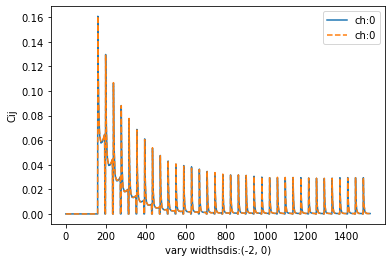

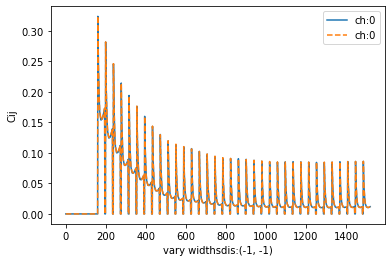

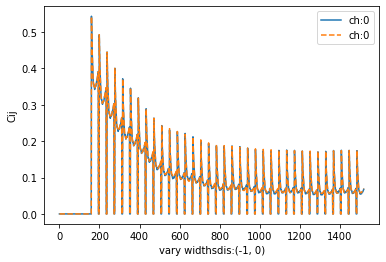

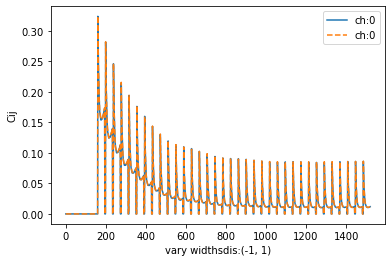

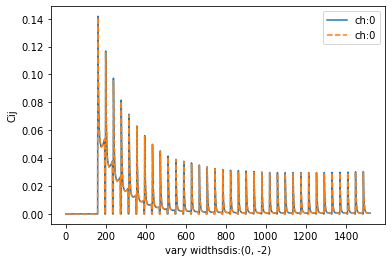

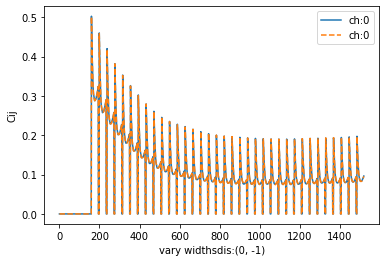

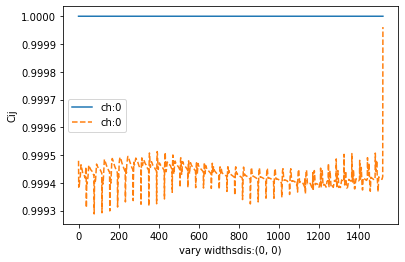

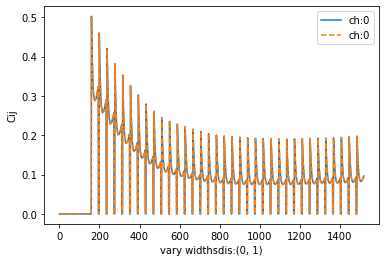

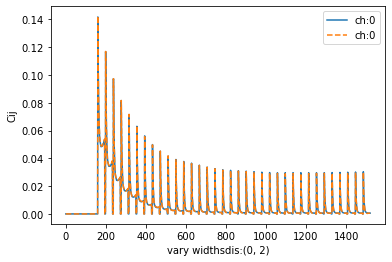

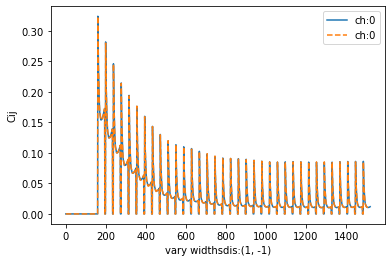

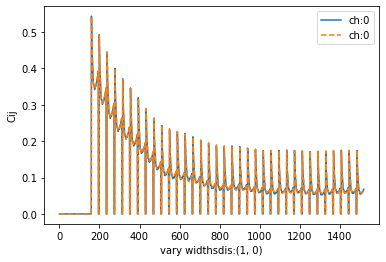

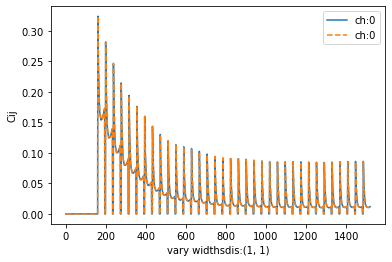

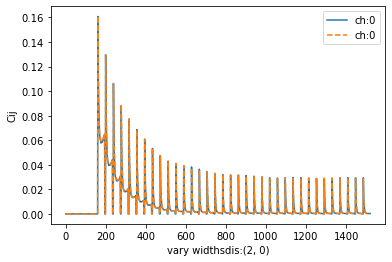

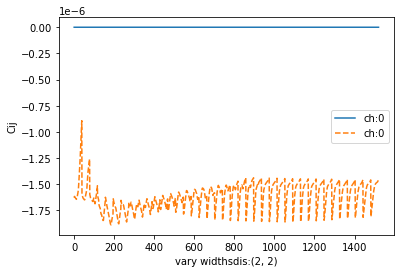

In [11]:
sim.fftting_C.fit(load = False, vis=True, steps = 3000)

using device:  cuda
decay_rate: 0.79
total epoches:40000 [curr:    0 relative_error:102.560000%].
total epoches:40000 [curr: 4000 relative_error:3.163000%].
total epoches:40000 [curr: 8000 relative_error:2.204000%].
total epoches:40000 [curr:12000 relative_error:1.691000%].
total epoches:40000 [curr:16000 relative_error:1.847000%].
total epoches:40000 [curr:20000 relative_error:0.990000%].
total epoches:40000 [curr:24000 relative_error:1.821000%].
total epoches:40000 [curr:28000 relative_error:1.001000%].
total epoches:40000 [curr:32000 relative_error:0.771000%].
total epoches:40000 [curr:36000 relative_error:0.599000%].
total epoches:40000 [curr:39999 relative_error:0.525000%].
fitting error > 0.1%, increase total steps or number of layers in fullconnected network.(note: < 1% is good enough, but < 0.1% is the safest.)
model saved.


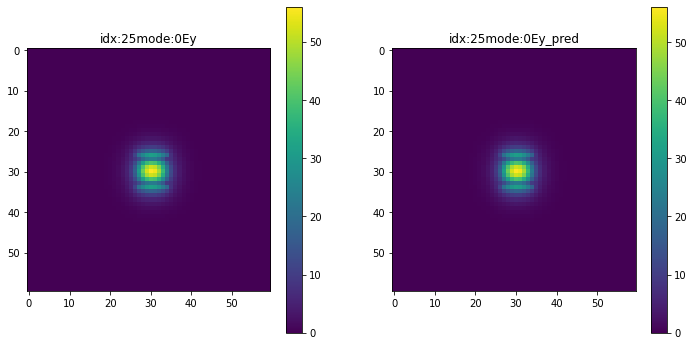

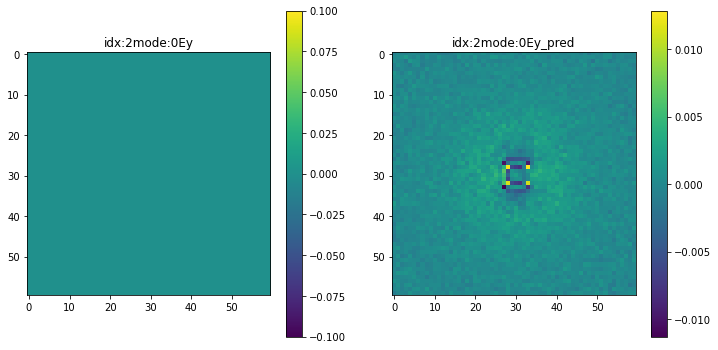

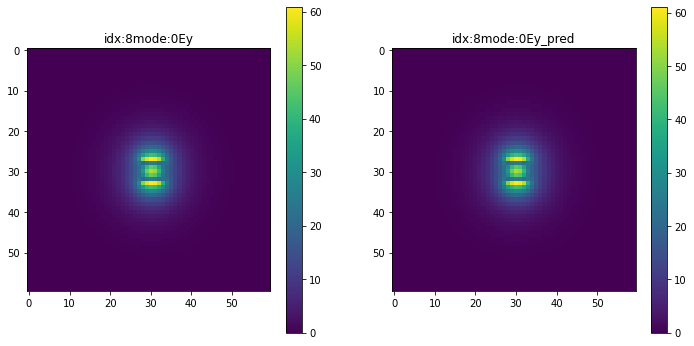

In [25]:
#if you change downsample_ratio, you should rerun fitting_E.
sim.fftting_E.fit(vis=True, layers = 5, steps = 40000)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [01:55<00:00,  2.97s/it]


K dataset generated. dataset size: 21294
K dataset saved.
using device:  cuda
decay_rate: 0.79
total epoches: 6000 [curr:    0 relative_error:88.322000%].
total epoches: 6000 [curr:  600 relative_error:19.228000%].
total epoches: 6000 [curr: 1200 relative_error:5.398000%].
total epoches: 6000 [curr: 1800 relative_error:3.644000%].
total epoches: 6000 [curr: 2400 relative_error:3.505000%].
total epoches: 6000 [curr: 3000 relative_error:3.941000%].
total epoches: 6000 [curr: 3600 relative_error:3.190000%].
total epoches: 6000 [curr: 4200 relative_error:3.137000%].
total epoches: 6000 [curr: 4800 relative_error:2.829000%].
total epoches: 6000 [curr: 5400 relative_error:2.616000%].
total epoches: 6000 [curr: 5999 relative_error:2.677000%].
fitting error > 0.1%, increase total steps or number of layers in fullconnected network.(note: < 1% is good enough, but < 0.1% is the safest.)
model saved.


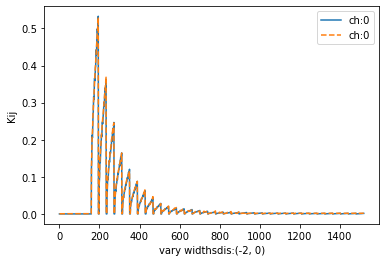

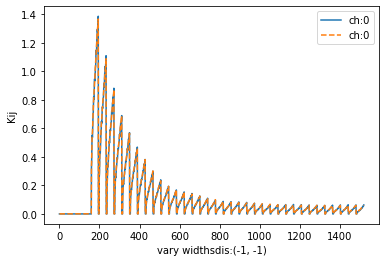

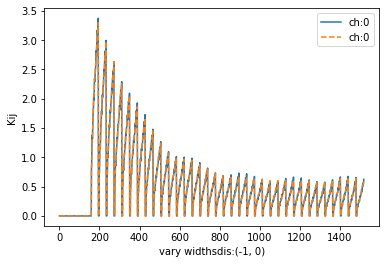

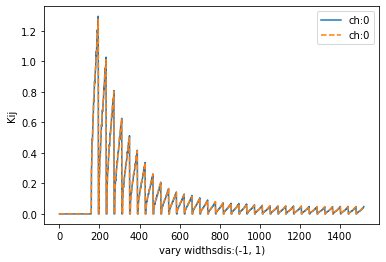

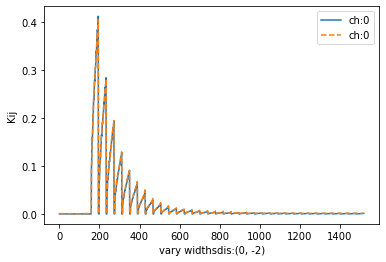

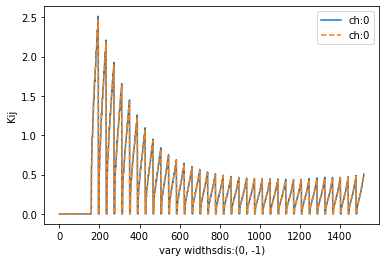

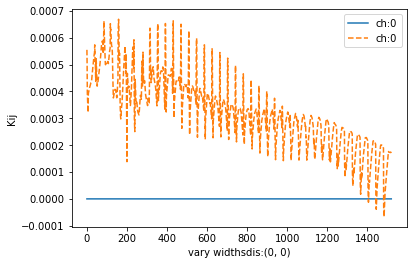

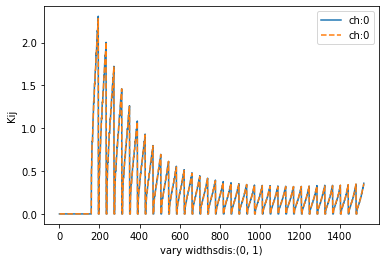

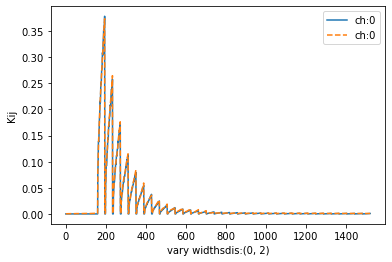

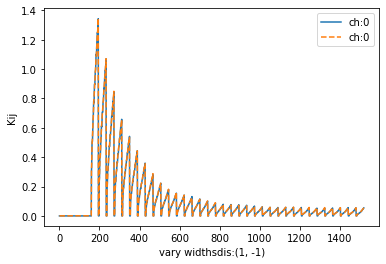

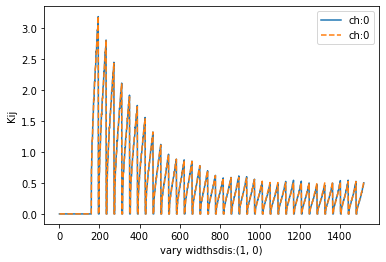

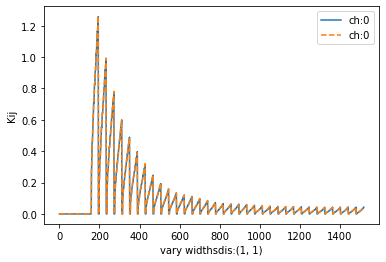

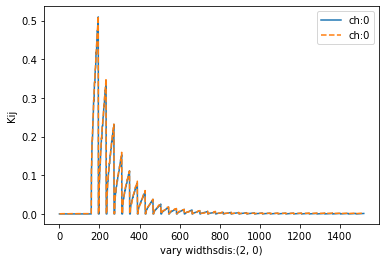

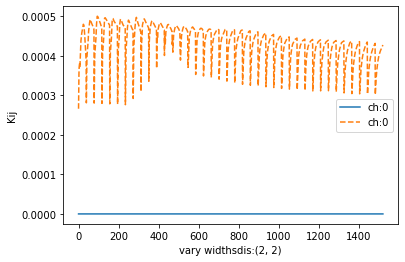

In [13]:
sim.fftting_K.fit(load = False, vis=True, steps = 6000)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [01:31<00:00,  2.35s/it]


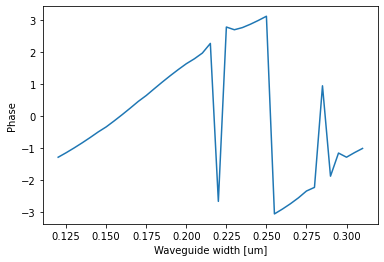

PBA width phase map saved.


In [14]:
sim.PBA.gen_lib()

# Periodic boundary approximation design lens

In [15]:
N = 30
NA = 0.8
prop_dis = 0.5 * N * GP['period'] * np.sqrt((1 - NA**2)/NA**2)
PBA_widths = np.load("PBA_widths_N" + str(N) + "lam_590.npy")

Optimizing by devs: ['cuda']
dis model input generated.
coo_sparse generated.
initialized by loaded h_paras.


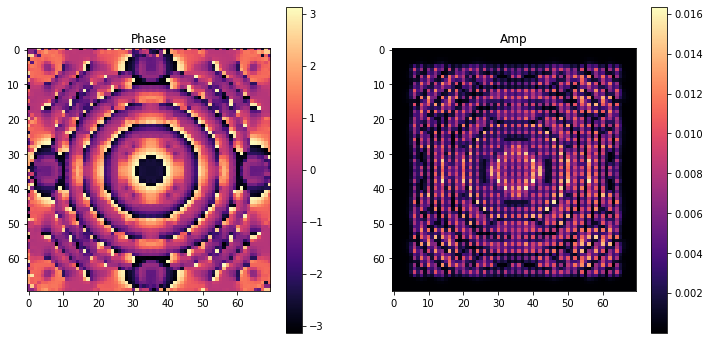

In [16]:
sim.scmt.init_model(N, prop_dis, APPROX= 0, COUPLING = True, init_hs= PBA_widths, far_field= False)
E_out =sim.scmt.forward()
sim.scmt.vis_field(E_out)

Optimizing by devs: ['cuda']
dis model input generated.
coo_sparse generated.
initialized by loaded h_paras.


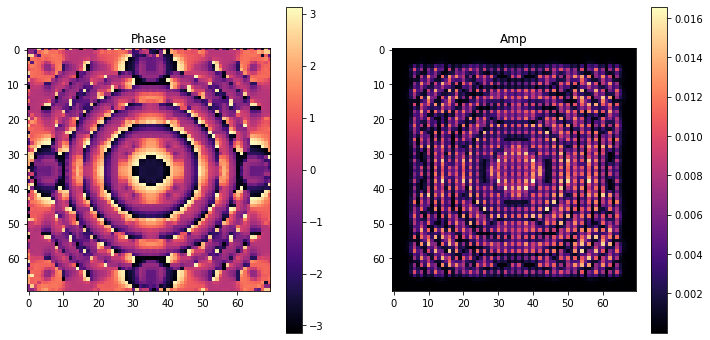

In [17]:
sim.scmt.init_model(N, prop_dis, APPROX= 1, Ni = 5 * N, COUPLING = True, init_hs= PBA_widths, far_field= False)
E_out =sim.scmt.forward()
sim.scmt.vis_field(E_out)

Optimizing by devs: ['cuda']
dis model input generated.
coo_sparse generated.
f_kernel generated.
initialized by loaded h_paras.


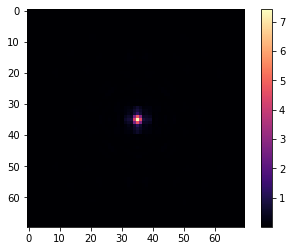

In [18]:
sim.scmt.init_model(N, prop_dis, APPROX= 0, COUPLING = True, init_hs= PBA_widths, far_field= True)
E_out =sim.scmt.forward()
sim.scmt.vis_field(E_out)

Optimizing by devs: ['cuda']
dis model input generated.
coo_sparse generated.
f_kernel generated.
initialized by loaded h_paras.


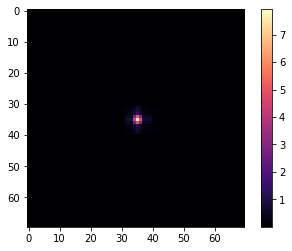

In [19]:
sim.scmt.init_model(N, prop_dis, APPROX= 1, Ni = 5 * N, COUPLING = True, init_hs= PBA_widths, far_field= True)
E_out =sim.scmt.forward()
sim.scmt.vis_field(E_out)

# fullwave validation

In [ ]:
sim.fullwave.init_sim(prop_dis, N, PBA_widths, res = 50, theta = 0)
sim.fullwave.upload(task_name="tidy3d_Apr25_N" + str(N) + "660nm")
sim.fullwave.download(data_path="output_cmt/")

In [ ]:
Ey_near, Ey_near_FW, Ey_far, Ey_far_FW = sim.fullwave.vis_monitor()

In [ ]:
plt.imshow(np.abs(Ey_far))

In [ ]:
plt.imshow(np.sqrt(E_out))